In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Implement Decision tree using CART algorithm.

Model Evaluation
Accuracy Score: 0.889

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.86      0.80      0.83        15
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



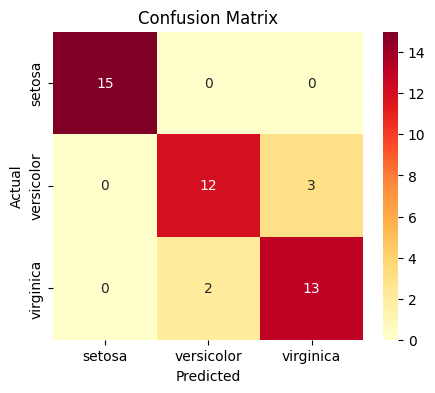

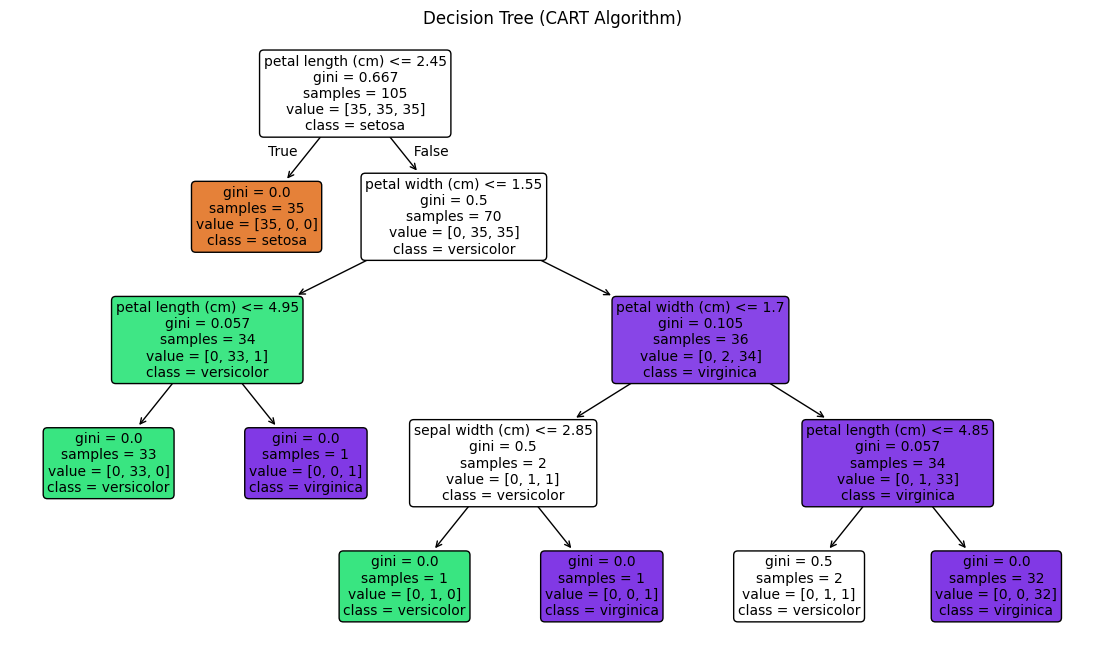

In [5]:
# Loading our Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Splitting data into train and test parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Creating the Decision Tree model (CART uses Gini Index)
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
# Training the model
dt_model.fit(X_train, y_train)

# Making predictions
y_pred = dt_model.predict(X_test)

# Checking how well the model did
print("Model Evaluation")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix visualization
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="YlOrRd",
    fmt="d",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting the decision tree
plt.figure(figsize=(14,8))
plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=True
)
plt.title("Decision Tree (CART Algorithm)")
plt.show()


Implement rule-based classification using OneR algorithm.

Best Feature Selected: petal width (cm)
Rule (Bin → Class):
  Bin 2: Class 1
  Bin 0: Class 0
  Bin 4: Class 2
  Bin 3: Class 2
  Bin 1: Class 1

Training Error Rate: 0.029
Test Accuracy: 0.889

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.86      0.80      0.83        15
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



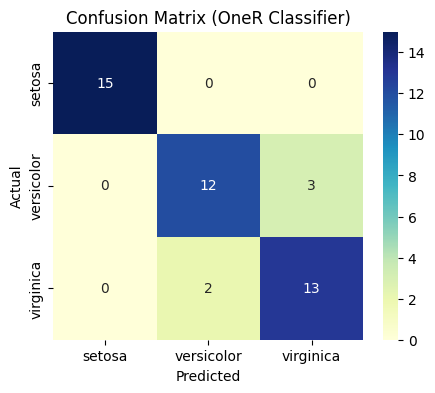

In [6]:
# Loading the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

def one_r(X, y, bins=5):
    rules = {}
    best_feature = None
    best_error = float('inf')

    for feature in X.columns:
        # Convert continuous values into bins
        X_binned = pd.cut(X[feature], bins=bins, labels=False)
        feature_rule = {}

        # For each bin, find the most common class
        for val in X_binned.unique():
            most_common_class = y[X_binned == val].mode()[0]
            feature_rule[val] = most_common_class

        # Predict on training data to calculate error
        y_pred = X_binned.map(feature_rule)
        error = sum(y_pred != y)

        # Keep track of best performing feature
        rules[feature] = feature_rule
        if error < best_error:
            best_error = error
            best_feature = feature

    return best_feature, rules[best_feature], best_error / len(y)

# Train the OneR model
best_feature, rule, error_rate = one_r(X_train, y_train)
print("Best Feature Selected:", best_feature)
print("Rule (Bin → Class):")
for k, v in rule.items():
    print(f"  Bin {k}: Class {v}")
print(f"\nTraining Error Rate: {error_rate:.3f}")

# Prediction Function
def predict_one_r(X, feature, rule, bins=5, default_class=None):
    X_binned = pd.cut(X[feature], bins=bins, labels=False)
    return X_binned.map(rule).fillna(default_class).astype(int)

# Set default class as most frequent one
default_class = y_train.mode()[0]

# Predict on test data
y_pred = predict_one_r(X_test, best_feature, rule, default_class=default_class)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix visualization
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="YlGnBu",
    fmt="d",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.title("Confusion Matrix (OneR Classifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()